# **Reducción de dimensionalidad**
La reducción de dimensionalidad nos permite deshacernos de columnas superfluas o compactar la información en un número reducido de estas. Lo que buscamos en un dataset más *parsimonioso*, es decir, que diga lo mismo en menos. Es por ello pelearemos por reducir más y más el número de columnas, pero sin que perdamos en el proceso una cantidad excesivamente importaten de información.

# **Análisis del DataFrame**

In [ ]:
!pip install --q factor_analyzer
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math
import seaborn as sns

raw_data = pd.read_csv("/content/drive/MyDrive/kaggle_datasets/BIG5_dataset.csv", sep='\t')

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 kB 1.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done


In [ ]:
raw_data.shape

(1015341, 110)

In [ ]:
pd.options.display.max_columns = 150

data = raw_data.sample(500_000, random_state=42)
data.drop(data.columns[50:], axis = 1, inplace = True)
data.head()

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,EST1,EST2,EST3,EST4,EST5,EST6,EST7,EST8,EST9,EST10,AGR1,AGR2,AGR3,AGR4,AGR5,AGR6,AGR7,AGR8,AGR9,AGR10,CSN1,CSN2,CSN3,CSN4,CSN5,CSN6,CSN7,CSN8,CSN9,CSN10,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10
564534,3.0,3.0,3.0,2.0,3.0,2.0,2.0,3.0,3.0,5.0,3.0,4.0,3.0,4.0,2.0,2.0,2.0,2.0,4.0,2.0,1.0,4.0,3.0,4.0,2.0,5.0,2.0,3.0,4.0,4.0,4.0,3.0,4.0,2.0,4.0,2.0,3.0,1.0,4.0,4.0,4.0,1.0,3.0,5.0,4.0,2.0,4.0,4.0,4.0,3.0
609728,3.0,2.0,4.0,4.0,4.0,1.0,3.0,5.0,2.0,4.0,2.0,4.0,2.0,2.0,2.0,2.0,4.0,3.0,3.0,4.0,1.0,5.0,3.0,5.0,1.0,4.0,1.0,4.0,4.0,5.0,2.0,4.0,4.0,3.0,2.0,2.0,4.0,4.0,2.0,4.0,3.0,1.0,4.0,1.0,4.0,2.0,5.0,3.0,4.0,4.0
152274,4.0,2.0,4.0,3.0,3.0,1.0,2.0,3.0,4.0,4.0,4.0,2.0,4.0,2.0,3.0,4.0,3.0,2.0,4.0,4.0,3.0,3.0,4.0,3.0,3.0,2.0,4.0,2.0,3.0,2.0,2.0,4.0,4.0,3.0,2.0,4.0,4.0,2.0,3.0,4.0,4.0,2.0,4.0,2.0,3.0,2.0,4.0,3.0,4.0,4.0
902438,4.0,2.0,4.0,2.0,3.0,1.0,4.0,3.0,4.0,3.0,3.0,5.0,4.0,1.0,2.0,2.0,3.0,1.0,3.0,3.0,1.0,5.0,2.0,5.0,2.0,4.0,2.0,5.0,5.0,4.0,3.0,3.0,4.0,1.0,2.0,2.0,4.0,1.0,4.0,4.0,4.0,1.0,5.0,1.0,5.0,1.0,4.0,2.0,5.0,4.0
597988,1.0,5.0,3.0,5.0,1.0,3.0,1.0,5.0,1.0,5.0,5.0,4.0,5.0,3.0,3.0,5.0,3.0,1.0,3.0,3.0,1.0,3.0,1.0,5.0,1.0,5.0,3.0,4.0,5.0,4.0,4.0,1.0,5.0,2.0,3.0,1.0,4.0,2.0,4.0,4.0,5.0,2.0,5.0,2.0,4.0,2.0,4.0,4.0,4.0,3.0


In [ ]:
num_columns = data.select_dtypes(include="number").columns.tolist()
print(num_columns)

['EXT1', 'EXT2', 'EXT3', 'EXT4', 'EXT5', 'EXT6', 'EXT7', 'EXT8', 'EXT9', 'EXT10', 'EST1', 'EST2', 'EST3', 'EST4', 'EST5', 'EST6', 'EST7', 'EST8', 'EST9', 'EST10', 'AGR1', 'AGR2', 'AGR3', 'AGR4', 'AGR5', 'AGR6', 'AGR7', 'AGR8', 'AGR9', 'AGR10', 'CSN1', 'CSN2', 'CSN3', 'CSN4', 'CSN5', 'CSN6', 'CSN7', 'CSN8', 'CSN9', 'CSN10', 'OPN1', 'OPN2', 'OPN3', 'OPN4', 'OPN5', 'OPN6', 'OPN7', 'OPN8', 'OPN9', 'OPN10']


In [ ]:
# VALORES FALTANTES
if data.isnull().values.any():
    data.dropna(inplace=True)
    print("Filas tras limpiar valores faltantes:",data.shape[0])

Filas tras limpiar valores faltantes: 499132


# **Análisis de Correlación**

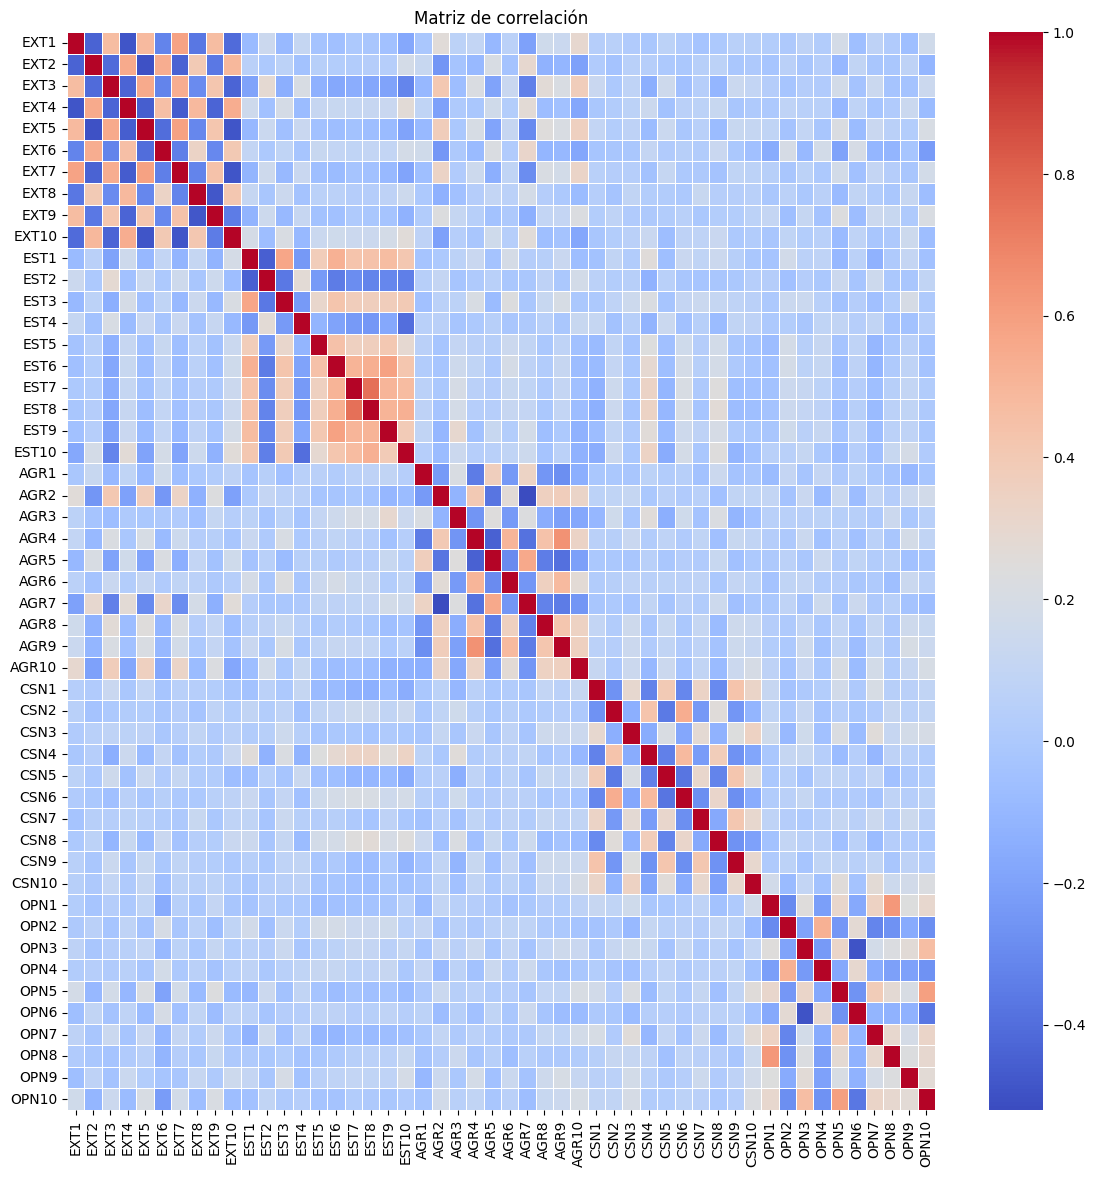

In [ ]:
# CORRELACIÓN
def corr_heat_visualization(df):
    # Seleccionar solo las columnas de interés
    numeric_cols = df.select_dtypes(include=['int64', 'float64'])

    # Calcular la matriz de correlación
    matrix_correlation = numeric_cols.corr()

    # Visualizar la matriz de correlación utilizando un mapa de calor
    plt.figure(figsize=(14, 14))
    sns.heatmap(matrix_correlation, cmap='coolwarm', fmt=".2f", linewidths=0.5)
    plt.title('Matriz de correlación')
    plt.show()

corr_heat_visualization(data)

# **Rescalado de datos**

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import Normalizer

# RESCALADO
std_scaler = StandardScaler()
minmax_scaler = MinMaxScaler()
norm_scaler = Normalizer(norm="l2")
robst_scaler = RobustScaler()

def rescale_data(df, scaler):
    data_standarized = df.copy()
    data_standarized = scaler.fit_transform(df)
    return data_standarized

data_standarized = rescale_data(data[num_columns], std_scaler)

# **PCA: Análisis de Componentes Principales**

**Análisis de Componentes Principales** (PCA, en inglés), es una técnica de reducción de dimensionalidad que se utiliza en el análisis de datos y aprendizaje automático. Su propósito principal es reducir la cantidad de variables en un conjunto de datos mientras se conserva la mayor cantidad de información posible. Esta reducción de dimensionalidad se realiza proyectando los datos en un nuevo sistema de coordenadas donde las dimensiones o *componentes principales* son ortogonales entre sí y están **ordenadas por la cantidad de varianza que explican en los datos originales**. La varianza es una medida de la dispersión de los datos, y al maximizar la varianza en las primeras componentes, se conserva la mayor cantidad de información posible del conjunto de datos original. La primera componente principal es la dirección en la que los datos varían más, la segunda componente principal es la dirección ortogonal a la primera en la que los datos varían más, y así sucesivamente.

PCA implica calcular los eigenvalues y eigenvectores. Son estos eigenvalues los que nos indican la cantidad de varianza explicada por cada eigenvector en los datos transformados. El estandar nos dice de seleccionar todos aquellos componentes que tengan un valor mayor de $1$, o cuando hayamos logrado un propoción importante de varianza acumulada explicada.

<div style="display: flex; justify-content: center;">
<img src="https://drive.google.com/uc?export=view&id=1kAOEW3ZKPLfLsOuybUQRs2VKYS5lFn31" width="600">

Los nuevos componentes principales son combinaciones lineales de las variables originales, por lo que realmente no tiene sentido interpretarlos como nuevas variables "reales" u ocultas. Se trata de simples constructos matemáticos que utilizamos para concentrar la información en el menor número de características posibles.

El cálculo de PCA exige trabajar con columnas estandarizadas (media $0$ y desviación típica $1$)

In [ ]:
# ANÁLISIS DE COMPONENTES PRINCIPALES
from sklearn.decomposition import PCA

# Generar PCA
n_components = 5
# Generamos nombres para los componentes indicados
pca_columns = []
for i in range(n_components):
  pca_columns.append(f"Componente {i+1}")

pca = PCA(n_components=n_components)
pca.fit(data_standarized) # fit() calcula las componentes principales y la varianza explicada por cada componente principal, pero no transforma los datos.
pca_data = pca.transform(data_standarized) # transform() aplica la transformación PCA calculada previamente a los datos.
pca_data = pd.DataFrame(pca_data, columns=pca_columns) # Lo convertimos en un nuevo DataFrame.

pca_data

,Componente 1,Componente 2,Componente 3,Componente 4,Componente 5
0,-1.077054,1.382462,-0.861324,0.872456,0.458277
1,-1.257224,-1.022203,0.324555,-0.448913,-2.219100
2,1.671012,0.112843,2.016702,-1.461838,1.834475
3,-3.444584,-0.774742,-0.671288,-0.318037,-0.935259
4,1.717516,-0.083812,-4.631115,0.695245,-1.357381
...,...,...,...,...,...
499127,-0.536820,-1.169138,0.764924,2.609869,0.838849
499128,2.255921,-0.309578,-0.028008,2.937251,1.799549
499129,2.954586,0.346121,-3.834654,2.365215,1.444372
499130,0.866027,-2.351908,-0.083556,0.716594,0.392444


In [ ]:
# VARIANZA EXPLICADA
# Estos son los eigenvalues de cada componente. Los interpretamos como la varianza explicada. Cuanto mayor es su velor más peso tiene el componente capturando información.
# En este caso los valores son muy bajos, inferiores al criterio de parada de 1.
pca_explained_variance = pd.DataFrame(pca.explained_variance_, columns=['Eigenvalue'])
pca_explained_variance

,Eigenvalue
0,7.183872
1,5.011715
2,3.966360
3,3.494796
4,2.786273


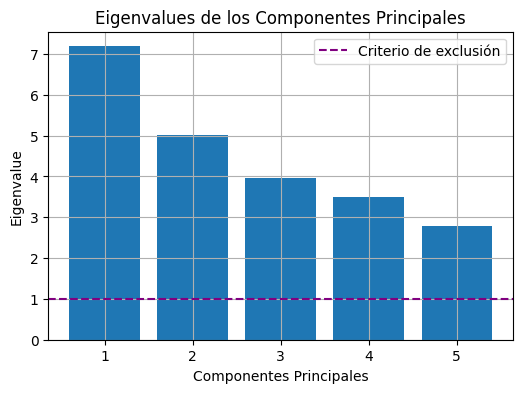

In [ ]:
# Grafica los eigenvalues de cada componente
plt.figure(figsize=(6, 4))
plt.bar(range(1, n_components + 1), pca_explained_variance['Eigenvalue'])
plt.xlabel('Componentes Principales')
plt.ylabel('Eigenvalue')
plt.title('Eigenvalues de los Componentes Principales')
plt.xticks(range(1, n_components + 1))
plt.axhline(y=1, color='purple', linestyle='--', label='Criterio de exclusión')
plt.grid(True)
plt.legend()
plt.show()

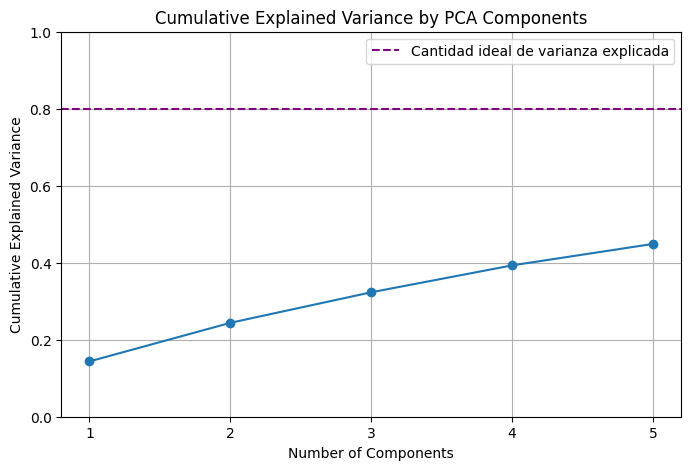

In [ ]:
# RATIO DE LA VARIANZA EXPLICADA
# Se trata simplemente de la ratio de cada eigenvalue respecto al sumatorio de todos los eigenvalues.
explained_variance_ratio = pd.DataFrame(pca.explained_variance_ratio_, columns=['Eigenvalue ratio'])

plt.figure(figsize=(8, 5))
plt.plot(range(1, n_components + 1), np.cumsum(explained_variance_ratio['Eigenvalue ratio']), marker='o', linestyle='-') # np.cumsum(variance_ratios) = suma acumulada de la proporción de varianza
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance by PCA Components')
plt.xticks(range(1, n_components + 1))
plt.axhline(y=0.8, color='purple', linestyle='--', label='Cantidad ideal de varianza explicada')
plt.legend()
plt.ylim(0, 1)
plt.grid(True)
plt.show()

In [ ]:
# CARGAS DE CADA COLUMNA
# Aquí seleccionamos las cargas de cada columna, es decir, los coeficientes o pesos que representan la contribución de cada variable original en cada componente principal.
pca_components_loadings = pd.DataFrame(pca.components_, columns=num_columns)
pca_components_loadings

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,EST1,EST2,EST3,EST4,EST5,EST6,EST7,EST8,EST9,EST10,AGR1,AGR2,AGR3,AGR4,AGR5,AGR6,AGR7,AGR8,AGR9,AGR10,CSN1,CSN2,CSN3,CSN4,CSN5,CSN6,CSN7,CSN8,CSN9,CSN10,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10
0,-0.200687,0.198172,-0.256857,0.216724,-0.240906,0.201830,-0.227803,0.149317,-0.180863,0.213502,0.150458,-0.129720,0.116146,-0.105601,0.127605,0.154199,0.147542,0.160108,0.166018,0.191283,0.092810,-0.183518,0.084519,-0.111531,0.132710,-0.051347,0.188415,-0.132510,-0.112194,-0.184231,-0.100241,0.046536,-0.067045,0.140073,-0.099846,0.086288,-0.038848,0.124461,-0.085278,-0.089108,-0.070252,0.094507,-0.045879,0.069420,-0.133763,0.084838,-0.107099,-0.030582,-0.012153,-0.120125
1,-0.097809,0.093720,-0.053773,0.021241,-0.120392,0.071721,-0.103515,0.027010,-0.091304,0.000982,-0.248685,0.136057,-0.253395,0.110281,-0.188760,-0.257555,-0.267189,-0.265166,-0.212833,-0.215700,0.092174,-0.173998,-0.043596,-0.218153,0.135887,-0.205411,0.120751,-0.165811,-0.231991,-0.117822,0.047496,-0.140837,-0.052748,-0.184073,0.056203,-0.147313,-0.018959,-0.106564,-0.001398,-0.035173,-0.070117,-0.016426,-0.161669,0.030074,-0.082815,0.057338,-0.035210,-0.090055,-0.149543,-0.131579
2,0.175344,-0.202048,0.086017,-0.214626,0.107087,-0.121907,0.147048,-0.229103,0.166993,-0.198267,-0.050127,0.012390,-0.108075,-0.008897,0.011179,0.001666,0.044173,0.048694,0.015116,-0.025899,0.074867,-0.017499,0.144740,-0.141631,0.038187,-0.122181,-0.006766,-0.117478,-0.129636,-0.065834,-0.256273,0.187834,-0.243629,0.181967,-0.227246,0.203053,-0.263582,0.171414,-0.248355,-0.235608,-0.098011,0.054489,-0.067559,0.039811,-0.093546,0.028068,-0.141857,-0.060097,-0.170883,-0.075613
3,0.017433,-0.045692,0.073620,-0.045284,0.030697,0.056517,0.035714,0.006761,-0.072695,-0.042977,0.090501,-0.070926,0.069832,0.003595,0.059324,0.068364,0.007950,0.009005,-0.002383,-0.050070,-0.102781,0.082431,-0.159428,0.164306,-0.174671,0.169742,-0.154946,0.121969,0.139163,0.050213,0.019573,-0.122643,-0.071541,-0.072240,0.110934,-0.103421,0.041215,-0.073894,0.112628,-0.076110,-0.303120,0.274872,-0.255490,0.228749,-0.277168,0.214714,-0.241390,-0.315434,-0.158515,-0.305719
4,0.170301,-0.104466,0.079010,-0.126899,0.133673,-0.030362,0.142602,-0.117624,0.170721,-0.098459,0.096904,-0.073351,0.059335,0.047817,0.123635,0.147885,0.142772,0.141752,0.225095,0.015218,0.231640,-0.110707,0.207347,-0.214931,0.246691,-0.149698,0.205851,-0.116729,-0.158891,-0.023088,0.209637,-0.159937,0.116963,-0.086407,0.228006,-0.143761,0.215329,-0.042944,0.225899,0.158041,-0.007905,0.143763,-0.060444,0.193428,0.077222,0.119519,0.042645,0.022662,-0.068671,0.006436


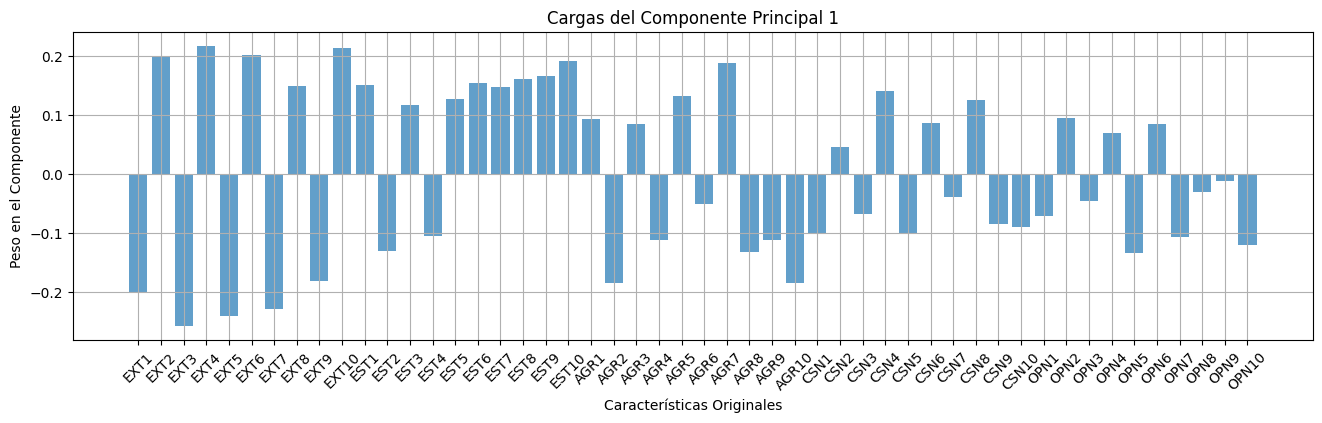

In [ ]:
component_number = 1  # Aquí seleccionamos el componente a graficar

component_index = component_number - 1
plt.figure(figsize=(16, 4))
plt.bar(range(pca_components_loadings.shape[1]), pca_components_loadings.iloc[component_index], alpha=0.7)
plt.xlabel('Características Originales')
plt.ylabel('Peso en el Componente')
plt.title(f'Cargas del Componente Principal {component_number}')
plt.xticks(range(pca_components_loadings.shape[1]), num_columns, rotation=45)
plt.grid(True)
plt.show()

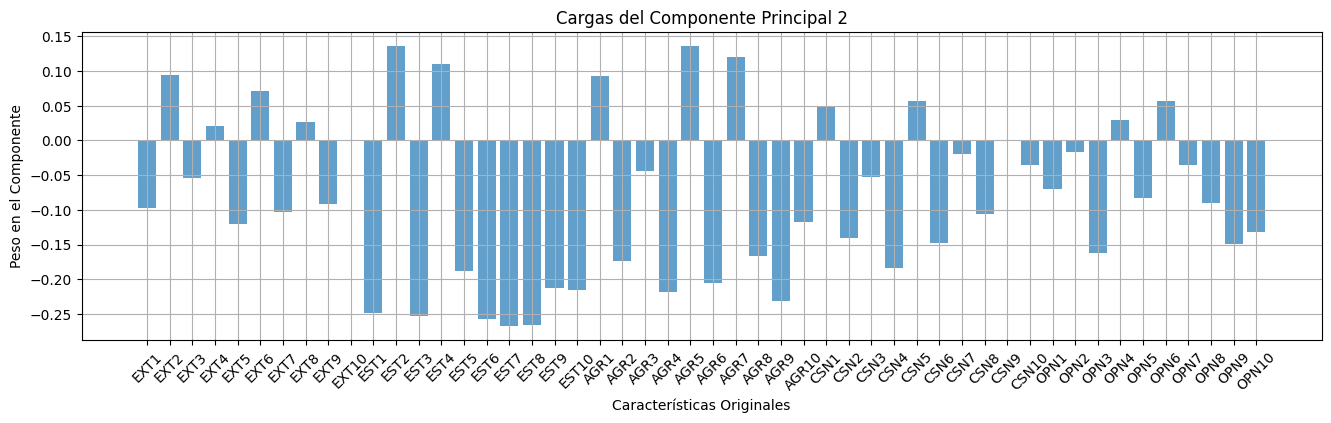

In [ ]:
component_number = 2

component_index = component_number - 1
plt.figure(figsize=(16, 4))
plt.bar(range(pca_components_loadings.shape[1]), pca_components_loadings.iloc[component_index], alpha=0.7)
plt.xlabel('Características Originales')
plt.ylabel('Peso en el Componente')
plt.title(f'Cargas del Componente Principal {component_number}')
plt.xticks(range(pca_components_loadings.shape[1]), num_columns, rotation=45)
plt.grid(True)
plt.show()

# **Análisis Factorial**

En ocasiones sospechamos que bajo nuestros datos se encuentran variables que no son medibles directamente. Se conocen como *variables latentes*, que se infieren a partir de otras variables observadas o medidas. Un ejemplo es un test psicológico, que mide una variable latente como puede ser la ansiedad a partir de otras variables como las puntuaciones en las preguntas del test.

El **Análisis Factorial** es una técnica estadística utilizada para identificar esas variables subyacentes entre variables observadas. Esto permite identificar estructuras ocultas en los datos y simplificar su interpretación. Mientras que PCA busca encontrar nuevas variables que son combinaciones lineales de las variables originales, el Análsis Factorial asume que las variables observadas son causadas por un número menor de factores latentes. Es por ello que los factores obtenidos tienen mayor interpretabilidad que en PCA.

Para aplicar Análisis Factorial, debe existir cierta colinealidad entre las variables, pero una multicolinealidad excesiva puede inflar las cargas factoriales y hacer que los factores sean inestables. La *Prueba de Esfericidad de Bartlett* permite verificar si las correlaciones entre las variables son suficientemente altas para aplicar un Análisis Factorial. Tambiés es recomendable que las variables se distribuyan normalmente.

La relación entre los nuevos factores extraídos y las variables originales se manifiestan a través de las llamadas *cargas factoriales*. Se trata de coeficientes que indican cuánto influye cada factor en cada variable observada y, por tanto, son cruciales para interpretar los resultados del Análisis Factorial. Cargas factoriales altas (en valor absoluto) para una variable en un factor particular sugieren que esa variable es un buen representante de ese factor.

En ocasiones, estas cargas factoriales pueden ser complejas de interpretar. En estos casos se utilizan técnicas conocidas como rotaciones. Hay dos principales técnicas de rotaciones:
- *ortogonal*: mantiene los factores en ángulos rectos entre sí (es decir, los factores permanecen no correlacionados). Esto significa que los factores resultantes siguen siendo independientes entre sí. Es preferible cuando la simplicidad y la claridad son más importantes que la representación exacta de las relaciones entre factores. La rotación ortogonal más típica es *Varimax*.
- *oblicua*: permite que los factores se correlacionen entre sí. Esto significa que los factores resultantes pueden no ser independientes, lo cual puede ser más realista en situaciones donde las variables subyacentes están relacionadas. Usualmente suele aplicarse la rotación *Promax*.

In [ ]:
# PRUEBA DE ESFERICIDAD DE BARTLETT
from factor_analyzer import calculate_bartlett_sphericity
import numpy as np

chi_square_value, p_value = calculate_bartlett_sphericity(data[num_columns])

print(f"Chi-cuadrado: {chi_square_value}")
print(f"p-valor: {p_value}")

"""
  Si el p-valor es menor que 0.05, la prueba es significativa y puedes proceder con el análisis factorial.
  Si el p-valor es mayor o igual a 0.05, la prueba no es significativa y los datos pueden no ser adecuados para el análisis factorial.
"""
if p_value < 0.05:
    print("La prueba de esfericidad de Bartlett es significativa (p < 0.05), por lo tanto, es adecuado proceder con el análisis factorial.")
else:
    print("La prueba de esfericidad de Bartlett no es significativa (p >= 0.05). Los datos pueden no ser adecuados para el análisis factorial.")

Chi-cuadrado: 9357993.224248843
p-valor: 0.0
La prueba de esfericidad de Bartlett es significativa (p < 0.05), por lo tanto, es adecuado proceder con el análisis factorial.


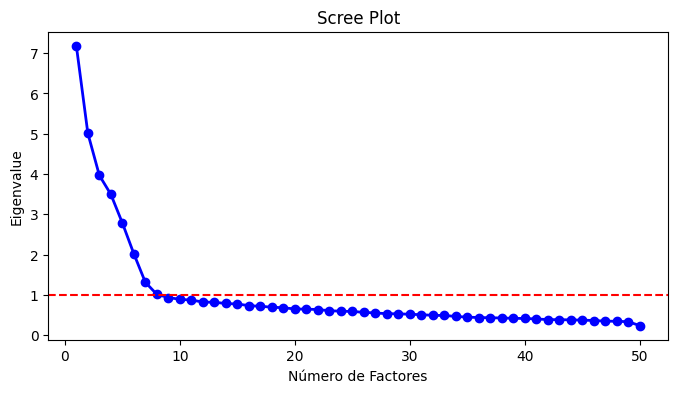

In [ ]:
# Método de Eigenvalues para evaluar la optimización del Análisis Factorial.
# Es esperable un número de factores igual al número de eigenvalues por encima de 1.
correlation_matrix = np.corrcoef(data_standarized, rowvar=False)

# Calcular los valores propios
eigenvalues, eigenvectors = np.linalg.eig(correlation_matrix)

eigenvalues_sorted = np.sort(eigenvalues)[::-1]
# Crear el gráfico de sedimentación
plt.figure(figsize=(8, 4))
plt.plot(range(1, len(eigenvalues_sorted) + 1), eigenvalues_sorted, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Número de Factores')
plt.ylabel('Eigenvalue')
plt.axhline(y=1, color='r', linestyle='--')
plt.show()

In [ ]:
# EJECUCIÓN DEL ANÁLISIS FACTORIAL
from sklearn.decomposition import FactorAnalysis

n_factors = 5
fa_columns = []
for i in range(n_factors):
  fa_columns.append(f"Factor {i+1}")

# Realizamos el Análisis Factorial
fa = FactorAnalysis(n_components=n_factors, rotation="varimax", random_state=42)  # Ajusta el número de componentes según sea necesario
fa.fit(data_standarized)

# Transformar los datos
df_factors = fa.transform(data_standarized)
print("Tamaño del dataset factorizado: ", df_factors.shape)

Tamaño del dataset factorizado:  (499132, 5)


In [ ]:
df_factors

array([[ 0.02611252,  0.50783418, -0.05310663,  0.33589765,  0.68307464],
       [-0.03823134,  0.31548727, -0.91422531, -0.414269  , -0.82439032],
       [-0.37847422, -0.55792927,  1.33627412, -0.07516939, -0.39419303],
       ...,
       [ 1.29173449, -0.98475318, -0.1857224 ,  0.78747188,  1.7399029 ],
       [-0.22257555, -1.13771482, -0.29917782,  0.24335118,  0.04983581],
       [-0.34104839,  0.03119587, -0.63246443, -0.1121256 ,  0.99429506]])

In [ ]:
# Obtenemos la carga factorial
loadings = pd.DataFrame(fa.components_.T, index=num_columns, columns=fa_columns)

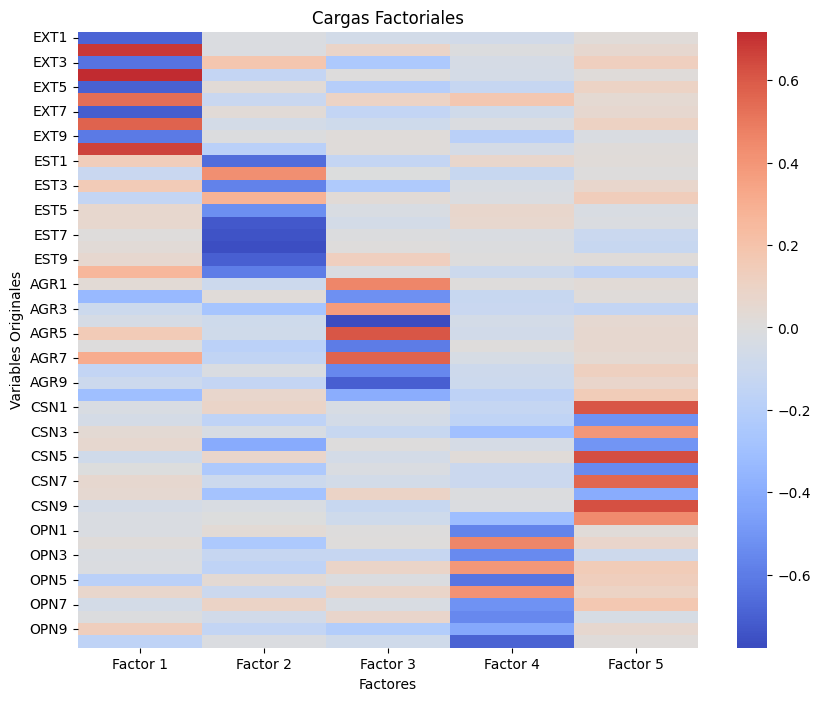

In [ ]:
# Crear un mapa de calor para visualizar las cargas factoriales
plt.figure(figsize=(10, 8))
sns.heatmap(loadings, cmap='coolwarm', center=0)
plt.title('Cargas Factoriales')
plt.xlabel('Factores')
plt.ylabel('Variables Originales')
plt.show()

Realizar Análisis Factorial con este Dataset: https://www.kaggle.com/datasets/lucasgreenwell/ocean-five-factor-personality-test-responses.
Enlace de carga abajo: